In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

from astropy.io import fits
from astropy.table import Table
import astropy.units as u

from IPython.display import clear_output

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Georgia',
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [2]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_15Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_training_catalog_15Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

In [3]:
print(f'Len of KiDS cat: {len(KiDS_cat)}')
print(f'Len of GAMA cat: {len(GAMA_cat)}')

Len of KiDS cat: 267875
Len of GAMA cat: 48737


In [4]:
print('KiDS: ', [key[:2] for key in KiDS_cat.keys() if key.endswith('col')])
print('GAMA: ', [key[:2] for key in GAMA_cat.keys() if key.endswith('col')])

KiDS:  ['ug', 'gr', 'ri', 'iZ']
GAMA:  ['ug', 'gr', 'ri', 'iz']


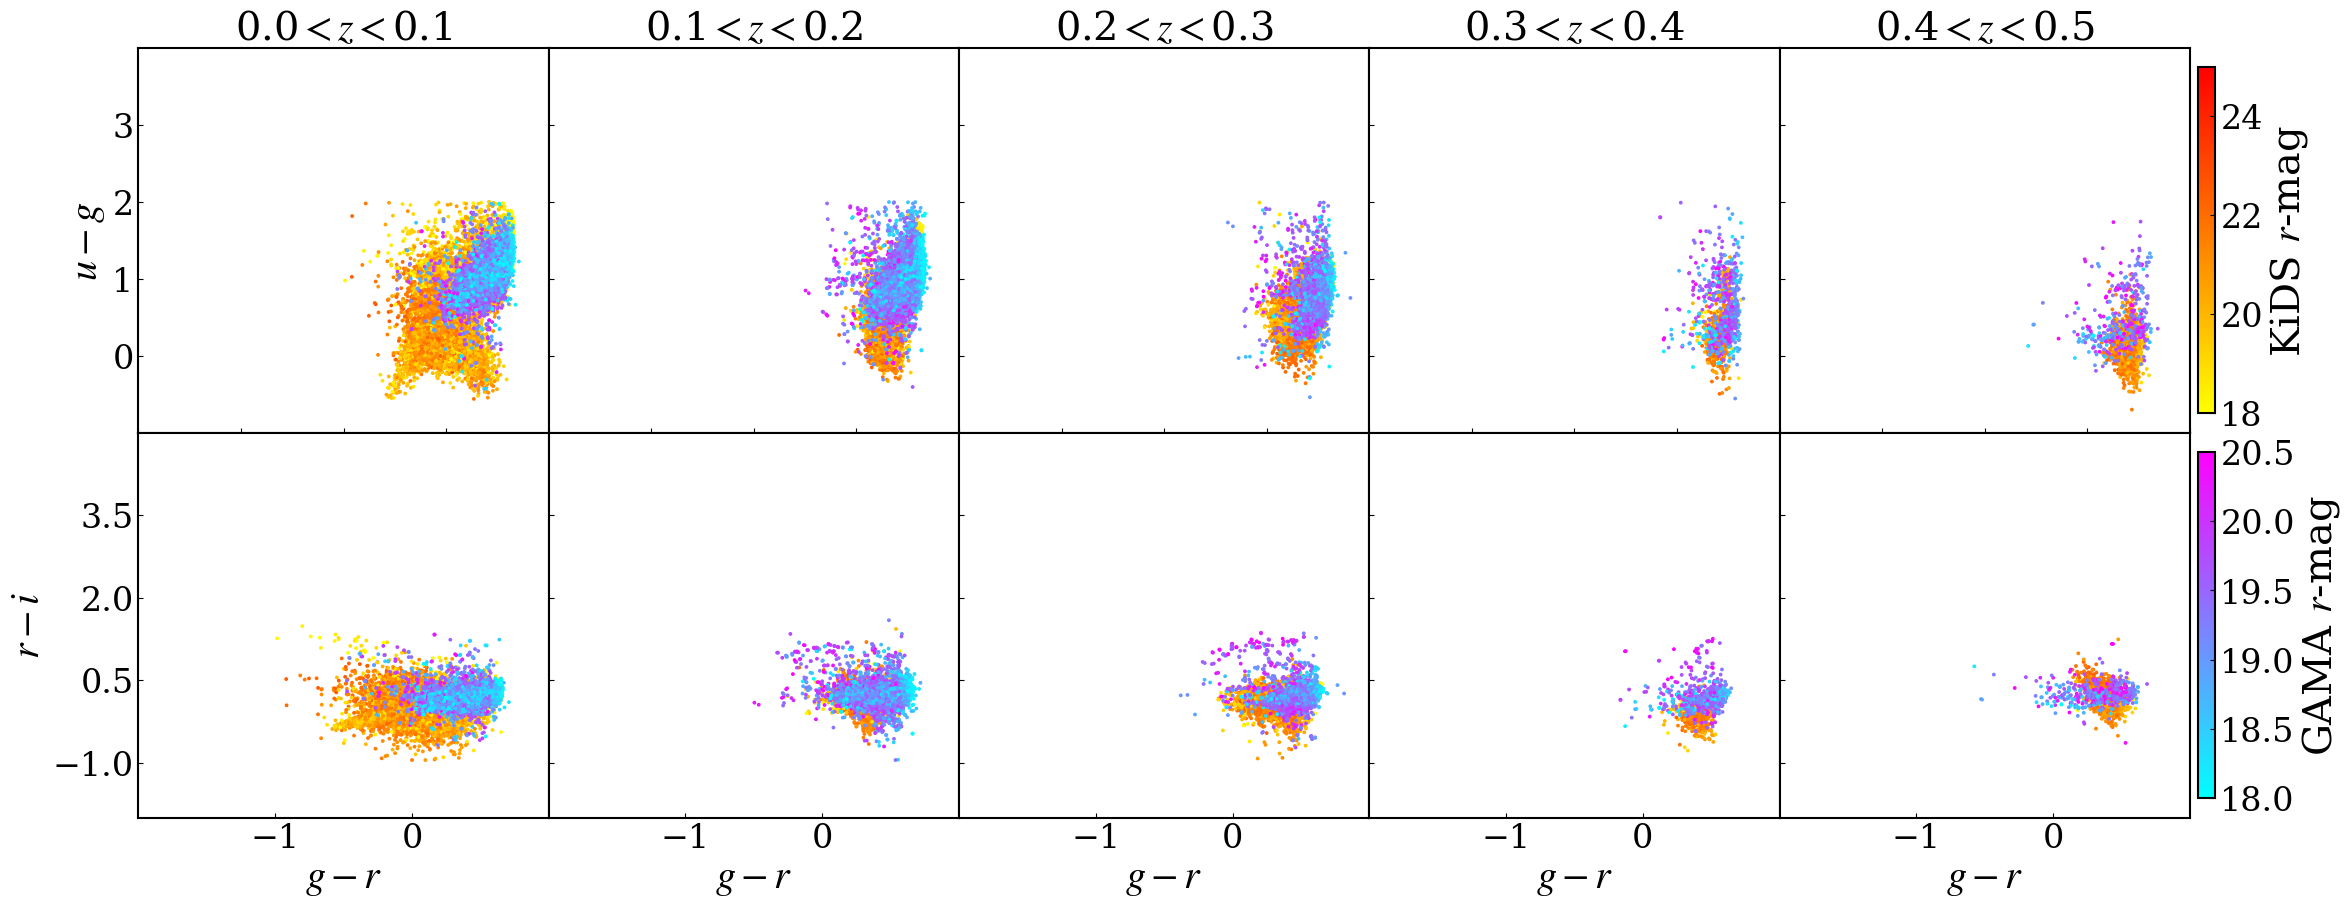

In [5]:
fig = plt.figure(figsize = (27, 10))

gs = fig.add_gridspec(2, 6, wspace = 0, hspace = 0, width_ratios = [1, 1, 1, 1, 1, 0.1])

for index in range(0, 5):
    
    KiDS_redshift_bin = (KiDS_cat['redshift'] > 0.10 * index) &\
                        (KiDS_cat['redshift'] < 0.10 * index + 0.10)
    
    GAMA_redshift_bin = (GAMA_cat['redshift'] > 0.10 * index) &\
                        (GAMA_cat['redshift'] < 0.10 * index + 0.10)

    ax_t = fig.add_subplot(gs[0, index])

    ax_t.scatter(KiDS_cat[KiDS_redshift_bin]['gr_col'],
                 KiDS_cat[KiDS_redshift_bin]['ug_col'],
                 c = KiDS_cat[KiDS_redshift_bin]['r_mag'],
                 s = 3, cmap = 'autumn_r', vmin = 18, vmax = 25)
    
    ax_t.scatter(GAMA_cat[GAMA_redshift_bin]['gr_col'],
                 GAMA_cat[GAMA_redshift_bin]['ug_col'],
                 c = GAMA_cat[GAMA_redshift_bin]['r_mag'],
                 s = 3, cmap = 'cool', vmin = 18, vmax = 20.5)
    
    ax_t.set_ylim(-1, 4)
    ax_t.set_xlim(-3, 1)
    ax_t.set_yticks([0, 1, 2, 3])
    ax_t.set_xticklabels([])

    ax_t.set_title(f'{0.10 * index:.1f}$<z<${0.10 * index + 0.10:.1f}')

    ax_b = fig.add_subplot(gs[1, index])

    kids_mappable = ax_b.scatter(KiDS_cat[KiDS_redshift_bin]['gr_col'],
                 KiDS_cat[KiDS_redshift_bin]['ri_col'],
                 c = KiDS_cat[KiDS_redshift_bin]['r_mag'],
                 s = 3, cmap = 'autumn_r', vmin = 18, vmax = 25)
    
    gama_mappable = ax_b.scatter(GAMA_cat[GAMA_redshift_bin]['gr_col'],
                 GAMA_cat[GAMA_redshift_bin]['ri_col'],
                 c = GAMA_cat[GAMA_redshift_bin]['r_mag'],
                 s = 3, cmap = 'cool', vmin = 18, vmax = 20.5)
    
    ax_b.set_ylim(-2, 5)
    ax_b.set_xlim(-2, 1)
    ax_b.set_yticks([-1, 0.5, 2, 3.5])
    ax_b.set_xlabel('$g-r$')
    ax_b.set_xticks([-1, 0])

    if index != 0:
        ax_t.set_yticklabels([])
        ax_b.set_yticklabels([])

    if index == 0:
        ax_t.set_ylabel('$u-g$')
        ax_b.set_ylabel('$r-i$')

cbar_t = fig.add_subplot(gs[0, -1])
cbar_t.axis('off')
cbar_b = fig.add_subplot(gs[1, -1])
cbar_b.axis('off')

fig.colorbar(mappable = kids_mappable,
             ax = cbar_t, label = 'KiDS $r$-mag', fraction = 0.8, shrink = 0.9)
fig.colorbar(mappable = gama_mappable,
             ax = cbar_b, label = 'GAMA $r$-mag', fraction = 0.8, shrink = 0.9)

fig.subplots_adjust(wspace = 0, hspace = 0)

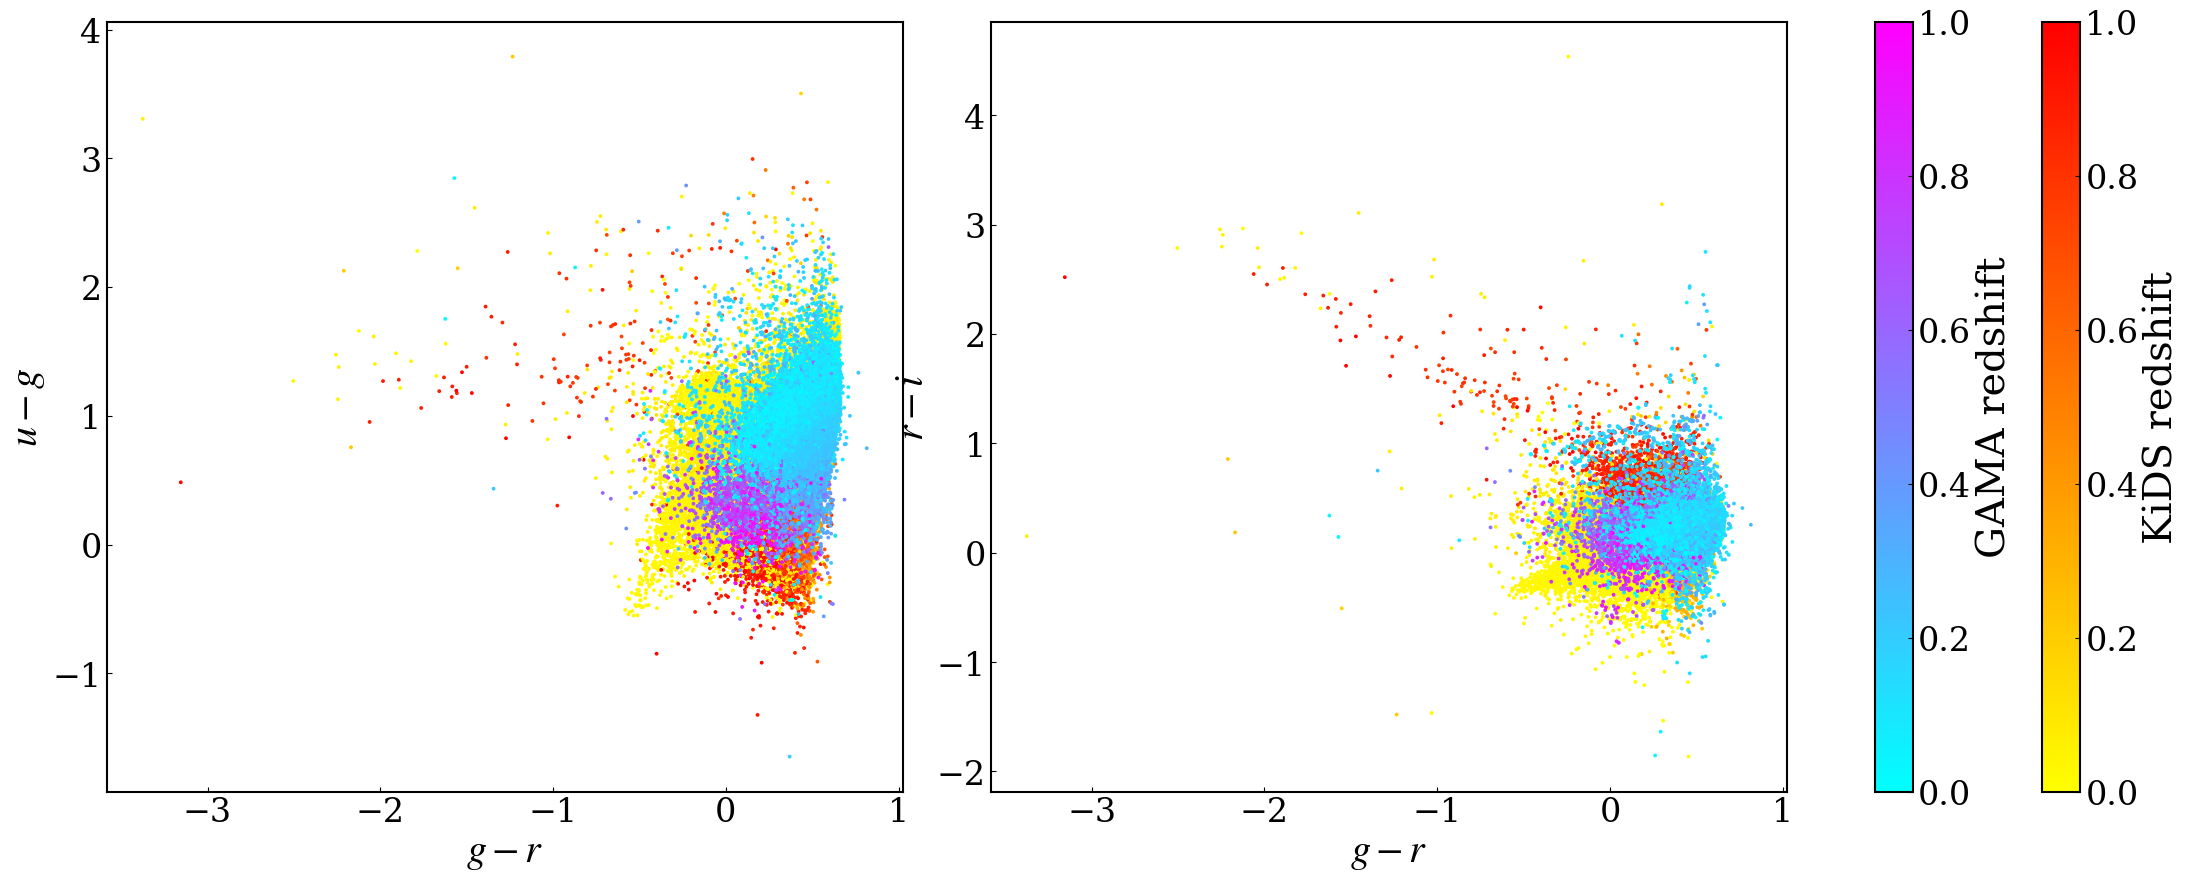

In [125]:
fig = plt.figure(figsize = (26, 10))
gs = fig.add_gridspec(1, 4, width_ratios = [1, 1, 0.1, 0.1])

ax_l = fig.add_subplot(gs[0, 0])

ax_l.scatter(KiDS_cat['gr_col'],
             KiDS_cat['ug_col'],
             c = KiDS_cat['redshift'],
             s = 3, cmap = 'autumn_r', vmin = 0, vmax = 1)

ax_l.scatter(GAMA_cat['gr_col'],
             GAMA_cat['ug_col'],
             c = GAMA_cat['redshift'],
             s = 3, cmap = 'cool', vmin = 0, vmax = 1)

ax_l.set_xlabel('$g-r$')
ax_l.set_ylabel('$u-g$')


ax_r = fig.add_subplot(gs[0, 1])

kids_mappable = ax_r.scatter(KiDS_cat['gr_col'],
             KiDS_cat['ri_col'],
             c = KiDS_cat['redshift'],
             s = 3, cmap = 'autumn_r', vmin = 0, vmax = 1)

gama_mappable = ax_r.scatter(GAMA_cat['gr_col'],
             GAMA_cat['ri_col'],
             c = GAMA_cat['redshift'],
             s = 3, cmap = 'cool', vmin = 0, vmax = 1)

ax_r.set_xlabel('$g-r$')
ax_r.set_ylabel('$r-i$', x = -0.05)

cbar_l = fig.add_subplot(gs[0, 2])
cbar_l.axis('off')
fig.colorbar(mappable = gama_mappable,
             label = 'GAMA redshift',
             ax = cbar_l, fraction = 1)

cbar_r = fig.add_subplot(gs[0, 3])
cbar_r.axis('off')
fig.colorbar(mappable = kids_mappable,
             label = 'KiDS redshift',
             ax = cbar_r, fraction = 1)

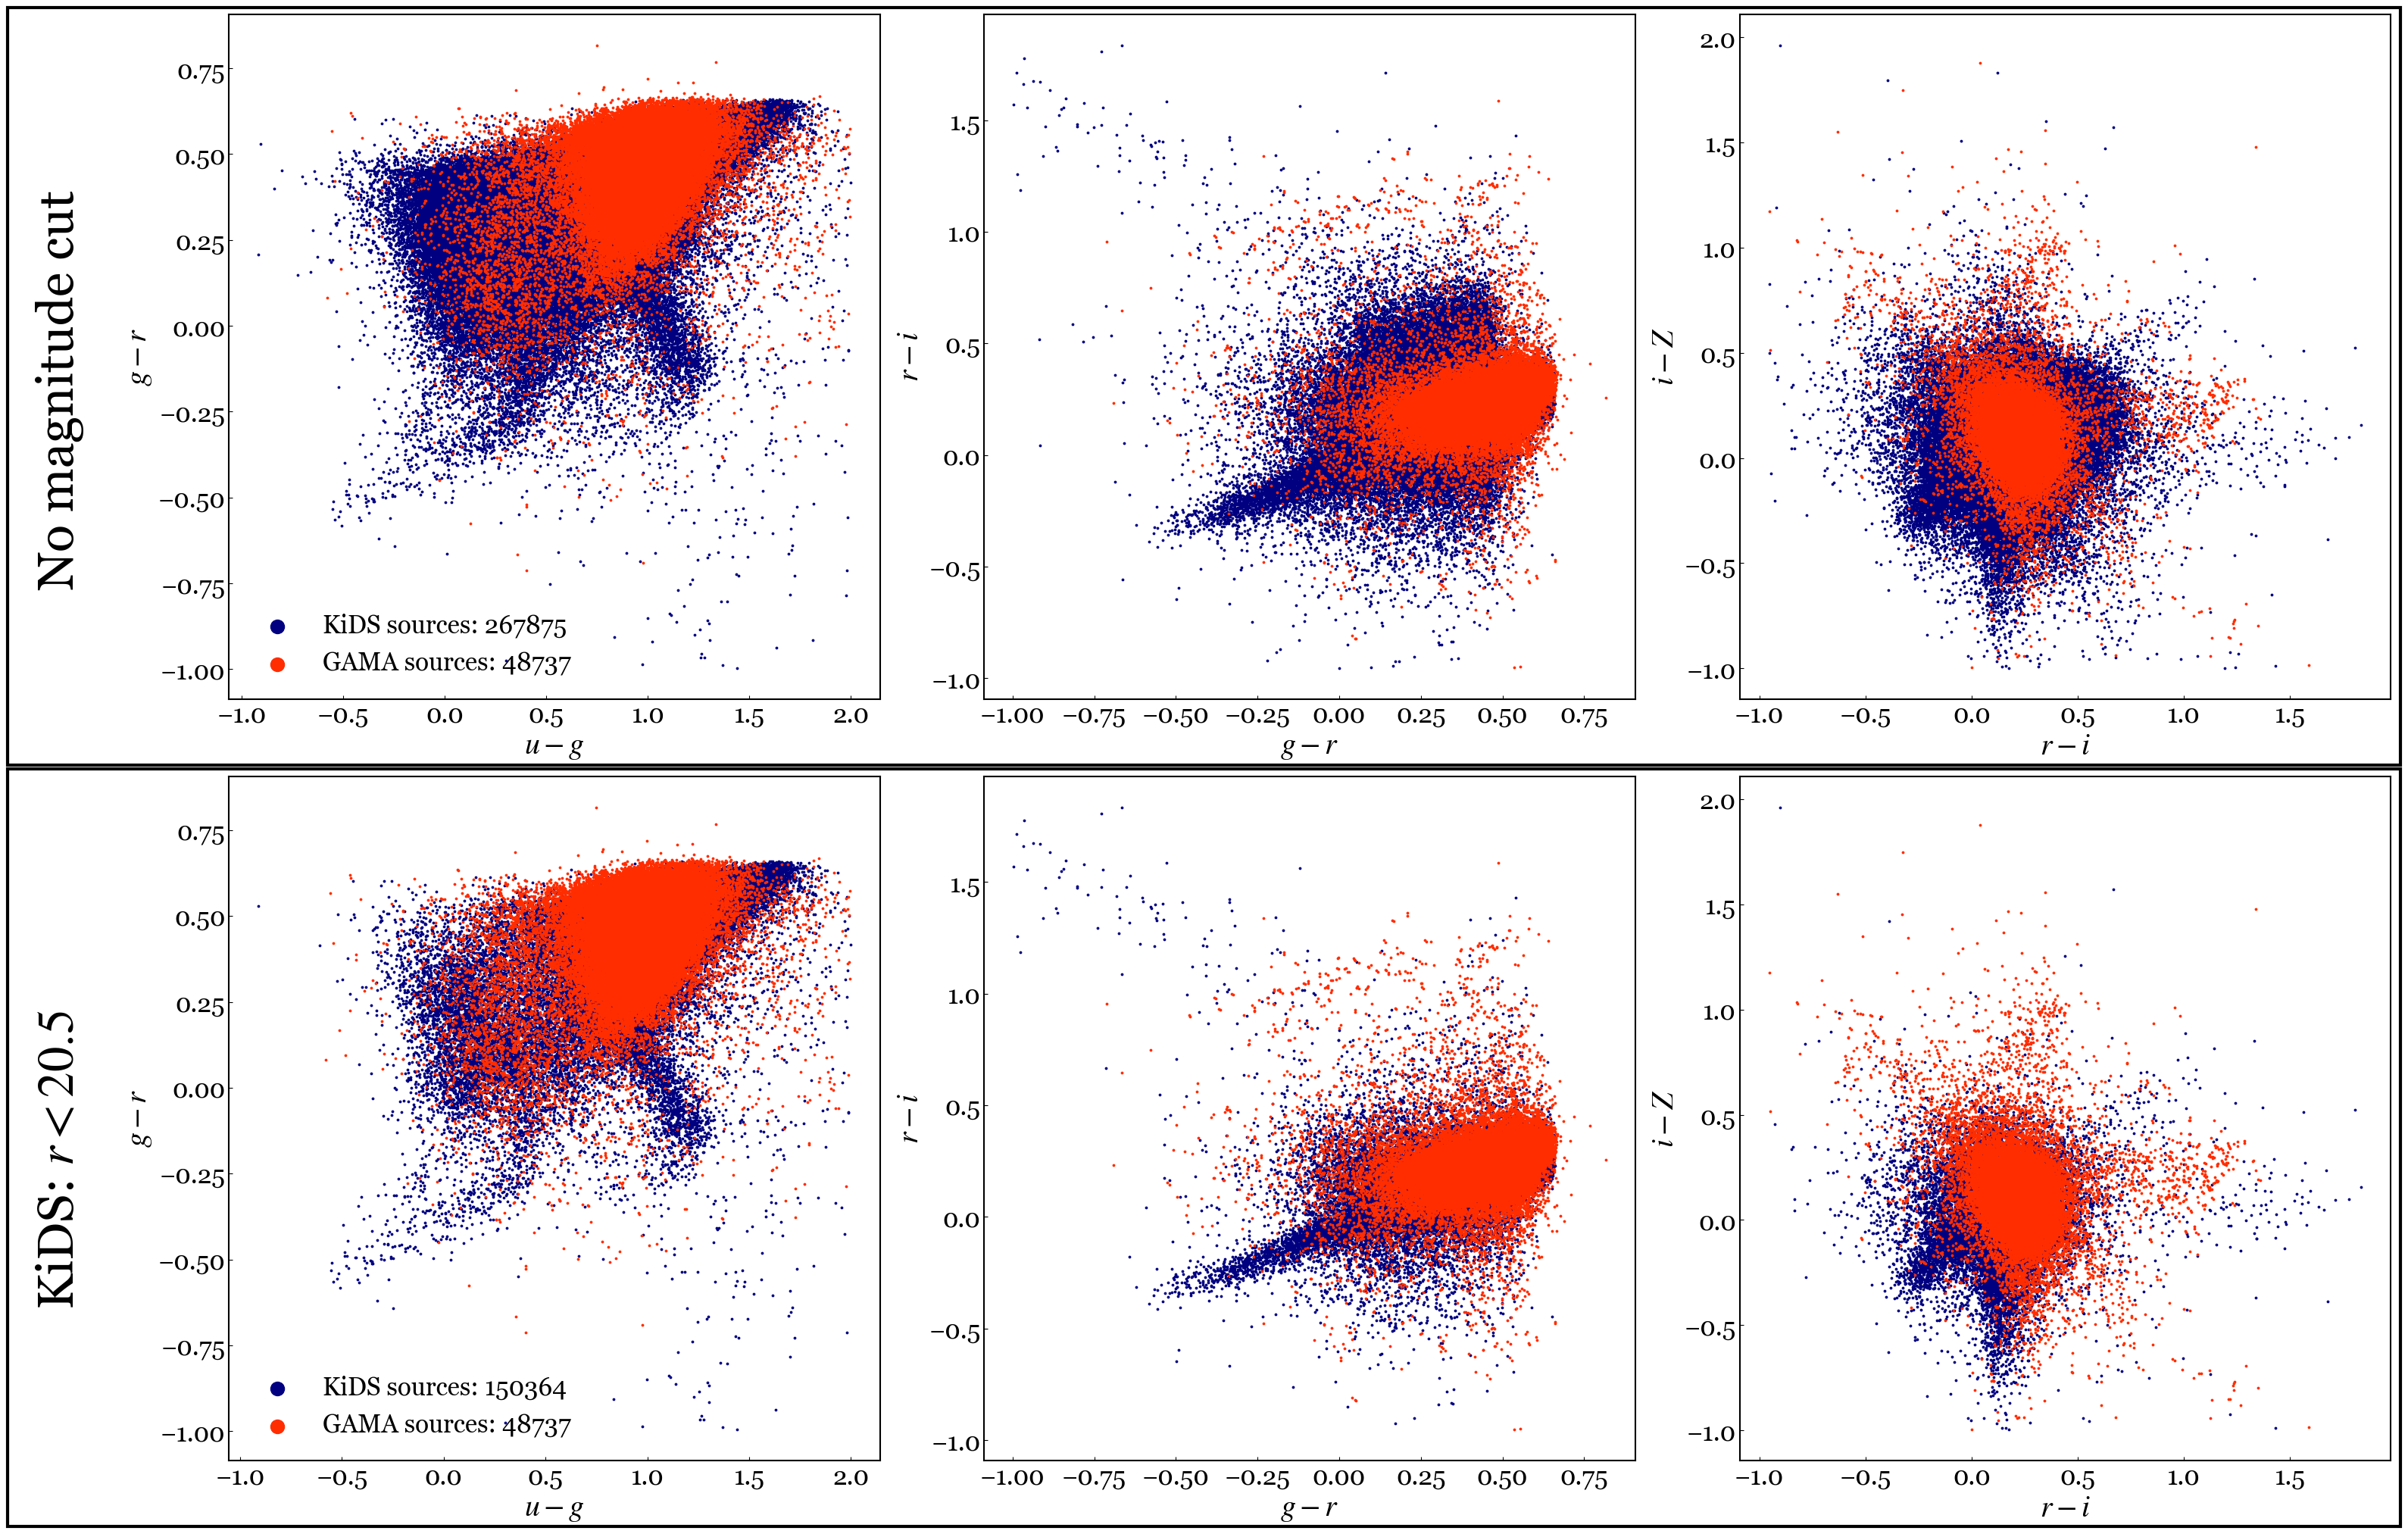

In [6]:
#Visualize input to make sure datasets overlap
fig = plt.figure(figsize = (30, 20), constrained_layout = True)

ax1 = fig.add_subplot(231)
ax1.scatter(KiDS_cat['ug_col'], KiDS_cat['gr_col'],
            color = mpl.cm.jet(0), s = 3,
            label = f'KiDS sources: {len(KiDS_cat)}')
ax1.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3,
            label = f'GAMA sources: {len(GAMA_cat)}')
ax1.set_xlabel('$u-g$'); ax1.set_ylabel('$g-r$')
ax1.legend(frameon = False, loc = 'lower left', markerscale = 7.5)

ax2 = fig.add_subplot(232)
ax2.scatter(KiDS_cat['gr_col'], KiDS_cat['ri_col'],
            color = mpl.cm.jet(0), s = 3)
ax2.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax2.set_xlabel('$g-r$'); ax2.set_ylabel('$r-i$')

ax3 = fig.add_subplot(233)
ax3.scatter(KiDS_cat['ri_col'], KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax3.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax3.set_xlabel('$r-i$'); ax3.set_ylabel('$i-Z$')

KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5

ax4 = fig.add_subplot(234)
ax4.scatter(KiDS_cat[KiDS_mag_cut]['ug_col'], KiDS_cat[KiDS_mag_cut]['gr_col'],
            color = mpl.cm.jet(0), s = 3,
            label = f'KiDS sources: {len(KiDS_cat[KiDS_mag_cut])}')
ax4.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3,
            label = f'GAMA sources: {len(GAMA_cat)}')
ax4.set_xlabel('$u-g$'); ax4.set_ylabel('$g-r$')
ax4.legend(frameon = False, loc = 'lower left', markerscale = 7.5)

ax5 = fig.add_subplot(235)
ax5.scatter(KiDS_cat[KiDS_mag_cut]['gr_col'], KiDS_cat[KiDS_mag_cut]['ri_col'],
            color = mpl.cm.jet(0), s = 3)
ax5.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax5.set_xlabel('$g-r$'); ax5.set_ylabel('$r-i$')

ax6 = fig.add_subplot(236)
ax6.scatter(KiDS_cat[KiDS_mag_cut]['ri_col'], KiDS_cat[KiDS_mag_cut]['i_mag'] - KiDS_cat[KiDS_mag_cut]['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax6.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax6.set_xlabel('$r-i$'); ax6.set_ylabel('$i-Z$')

rect_top = Rectangle((-0.05, 0.5025), 1.053, 0.5,
                     facecolor = 'none', edgecolor = 'black', linewidth = 3)

rect_btm = Rectangle((-0.05, 0), 1.053, 0.5,
                     facecolor = 'none', edgecolor = 'black', linewidth = 3)

fig.text(-0.027, 0.625, 'No magnitude cut',
         rotation = 90, fontsize = 48, horizontalalignment = 'center')
fig.text(-0.027, 0.15, 'KiDS: $r < 20.5$',
         rotation = 90, fontsize = 48, horizontalalignment = 'center')

fig.add_artist(rect_top)
fig.add_artist(rect_btm)